In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
ten_min_flow_density_data = pd.read_csv("data/10sec_100_m_flow_speed_1hr.csv")
ten_min_flow_density_data['quarter'] = pd.qcut(ten_min_flow_density_data['Space'], q=4, labels=[1, 2, 3, 4])

print(ten_min_flow_density_data)

                               Time     Space       Flow    Density quarter
0     2022-11-30 14:00:00.400000095  98170.01   182.8080  26.519997       1
1     2022-11-30 14:00:00.400000095  98270.01  1026.7020  57.319997       1
2     2022-11-30 14:00:00.400000095  98370.01  1411.0020  46.519995       1
3     2022-11-30 14:00:00.400000095  98470.01   466.5600   6.199999       1
4     2022-11-30 14:00:00.400000095  98570.01   717.8184  15.399998       2
...                             ...       ...        ...        ...     ...
5755  2022-11-30 14:59:50.400000095  99270.01   522.0216   7.119999       3
5756  2022-11-30 14:59:50.400000095  99370.01   918.4284  15.919998       4
5757  2022-11-30 14:59:50.400000095  99470.01  1453.2300  25.719997       4
5758  2022-11-30 14:59:50.400000095  99570.01  1130.8536  18.639997       4
5759  2022-11-30 14:59:50.400000095  99670.01  1675.5120  27.439995       4

[5760 rows x 5 columns]


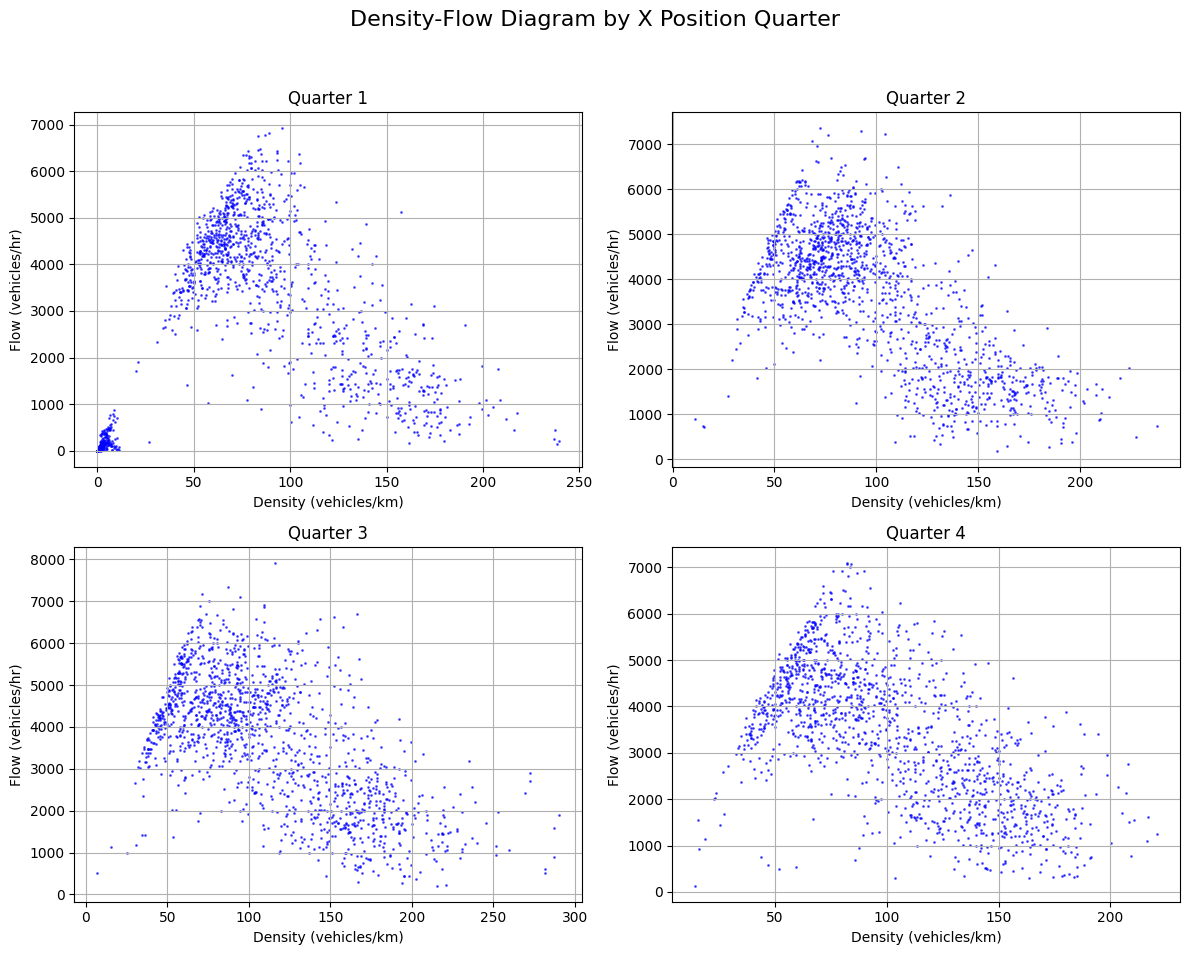

In [82]:
# Set up 2x2 plotting grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Create scatter plot for each quarter
for i in range(4):
    quarter_data = ten_min_flow_density_data[ten_min_flow_density_data['quarter'] == i + 1]
    flow = quarter_data["Flow"]
    density = quarter_data["Density"]
    
    axes[i].scatter(density, flow, c='blue', alpha=0.6, s=1)
    axes[i].set_title(f'Quarter {i + 1}')
    axes[i].set_xlabel('Density (vehicles/km)')
    axes[i].set_ylabel('Flow (vehicles/hr)')
    axes[i].grid(True)
    # axes[i].set_xlim(0, 6000)  # Uncomment if you want consistent x-limits

plt.suptitle('Density-Flow Diagram by X Position Quarter', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

vf for quarter 0: 76.81437148661182
vf for quarter 1: 87.38182552757864
vf for quarter 2: 82.32417739373773
vf for quarter 3: 85.34545141523819


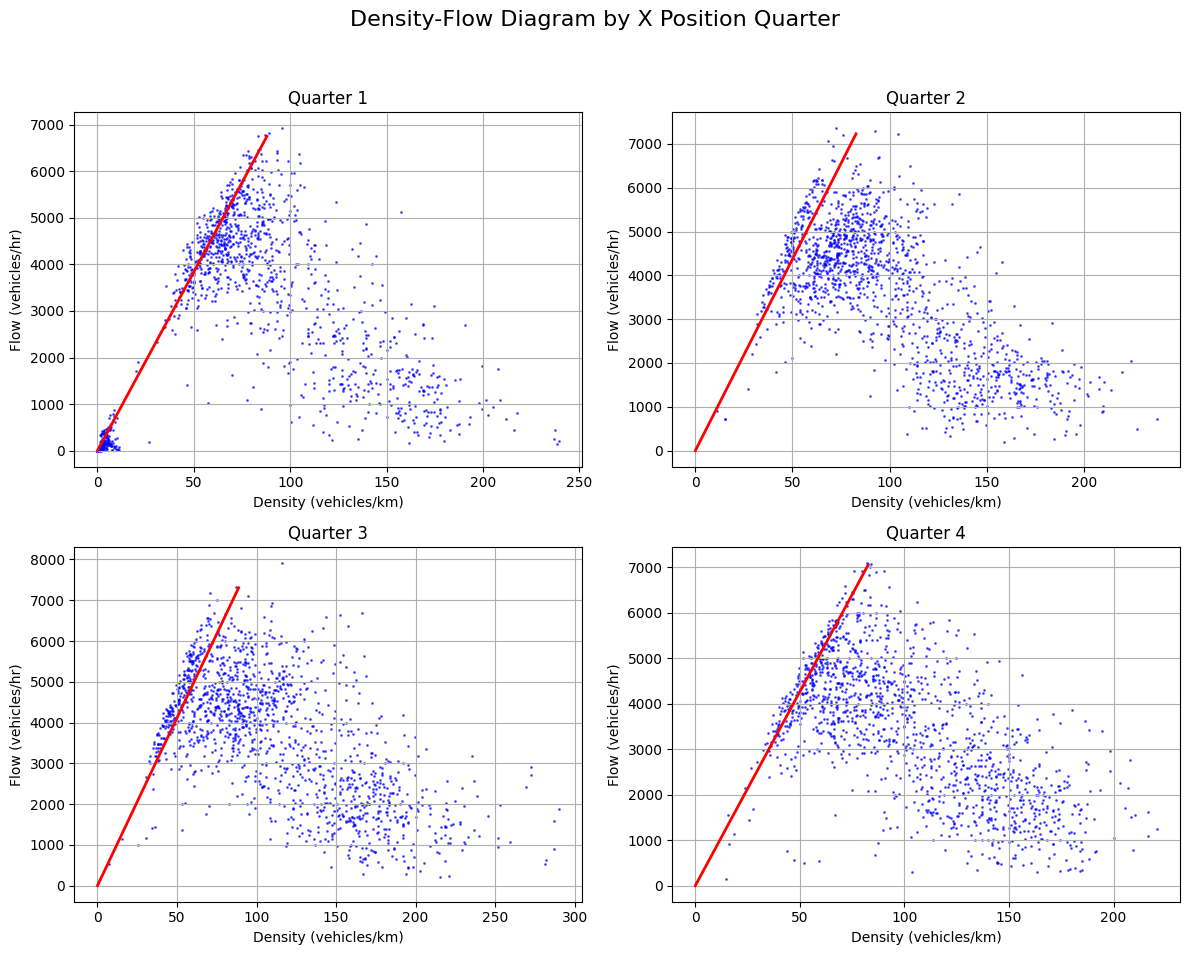

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Create scatter plot for each quarter
for i in range(4):
    quarter_data = ten_min_flow_density_data[ten_min_flow_density_data['quarter'] == i + 1]
    flow = quarter_data["Flow"].values
    density = quarter_data["Density"].values
    
    # Step 1: Identify critical density (density at max flow)
    sorted_indices = np.argsort(flow)[-5:]  # Get indices of top 3 flow values
    # third_largest_index = sorted_indices[0]  # Third largest flow
    # rho_c = density[third_largest_index]
    # q_max = flow[third_largest_index]
    q_max = flow[sorted_indices].mean()
    rho_c = density[sorted_indices].mean()
    
    # rho_c = density[np.argmax(flow)]
    # q_max = max(flow)  # Maximum flow at rho_c
    
    # mask_free_flow = density < rho_c
    mask_free_flow = (density < rho_c) & (density > 0)
    
    # vf = np.mean(flow[mask_free_flow] / density[mask_free_flow])  # Average slope
    vf = q_max/rho_c
    print(f"vf for quarter {i}: {vf}")
    # Step 3: Estimate congestion wave speed using linear regression for congested region
    mask_congested = density > rho_c
    # Fit a line to the congested region (rho > rho_c)
    w, b = np.polyfit(density[mask_congested], flow[mask_congested], 1)  # Get slope & intercept
    
    # Compute jam density correctly
    rho_free_flow = np.linspace(0, rho_c, 100)
    flow_free_flow = vf * rho_free_flow
    rho_j = -b/w
    # print("W", w)
    # print("b", b)
    # print("Rho j", rho_j)
    
    # Generate points for free-flow and congested lines
    rho_free_flow = np.linspace(0, rho_c, 100)
    flow_free_flow = vf * rho_free_flow  # Free-flow equation: q = v_f * rho
    
    rho_congested = np.linspace(rho_c, rho_j, 100)
    flow_congested = w * rho_congested + b # Corrected equation
    flow = quarter_data["Flow"]
    density = quarter_data["Density"]
    
    axes[i].scatter(density, flow, c='blue', alpha=0.6, s=1)
    axes[i].plot(rho_free_flow, flow_free_flow, 'r-', linewidth=2, label="Free-Flow Speed Fit")

    axes[i].set_title(f'Quarter {i + 1}')
    axes[i].set_xlabel('Density (vehicles/km)')
    axes[i].set_ylabel('Flow (vehicles/hr)')
    axes[i].grid(True)
    # axes[i].set_xlim(0, 6000)  # Uncomment if you want consistent x-limits

plt.suptitle('Density-Flow Diagram by X Position Quarter', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# flow = ten_min_flow_density_data["Flow"].values
# density = ten_min_flow_density_data["Density"].values

# # Step 1: Identify critical density (density at max flow)
# sorted_indices = np.argsort(flow)[-5:]  # Get indices of top 3 flow values
# # third_largest_index = sorted_indices[0]  # Third largest flow
# # rho_c = density[third_largest_index]
# # q_max = flow[third_largest_index]
# q_max = flow[sorted_indices].mean()
# rho_c = density[sorted_indices].mean()

# # rho_c = density[np.argmax(flow)]
# # q_max = max(flow)  # Maximum flow at rho_c

# # mask_free_flow = density < rho_c
# mask_free_flow = (density < rho_c) & (density > 0)

# # vf = np.mean(flow[mask_free_flow] / density[mask_free_flow])  # Average slope
# vf = q_max/rho_c
# # Step 3: Estimate congestion wave speed using linear regression for congested region
# mask_congested = density > rho_c
# # Fit a line to the congested region (rho > rho_c)
# w, b = np.polyfit(density[mask_congested], flow[mask_congested], 1)  # Get slope & intercept

# # Compute jam density correctly
# rho_j = -b/w
# print("W", w)
# print("b", b)
# print("Rho j", rho_j)

# # Generate points for free-flow and congested lines
# rho_free_flow = np.linspace(0, rho_c, 100)
# flow_free_flow = vf * rho_free_flow  # Free-flow equation: q = v_f * rho

# rho_congested = np.linspace(rho_c, rho_j, 100)
# flow_congested = w * rho_congested + b # Corrected equation

# # y = mx + b
# # 0 = mx_k + b
# # x_k = -b/m



# # Plot original data
# plt.figure(figsize=(8, 6))

# plt.scatter(density, flow, c='blue', alpha=0.6, s = 1, label="Data")
# plt.scatter(rho_c, q_max, c = 'orange', alpha = 1.0, label = "rho_c, C_i")

# # Plot free-flow speed line
# plt.plot(rho_free_flow, flow_free_flow, 'r-', linewidth=2, label="Free-Flow Speed Fit")

# # Plot congested region line
# plt.plot(rho_congested, flow_congested, 'g-', linewidth=2, label="Congested Region Fit")

# plt.axvline(rho_c, color='black', linestyle="--", label="Critical Density")
# plt.axvline(rho_j, color='gray', linestyle="--", label="Jam Density")

# plt.xlabel("Density (vehicles per kilometer)")
# plt.ylabel("Flow (vehicles per hour)")
# plt.title("Triangular Fundamental Diagram Fit")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Calculate capacity drop
# cap_drop = flow_free_flow[-1] - flow_congested[0]
# # Print estimated parameters
# print(f"Estimated Free-Flow Speed: {vf:.2f} km/h")
# print(f"Estimated Congestion Wave Speed: {w:.2f} km/h")
# print(f"Estimated Critical Density: {rho_c:.2f} vehicles/km")
# print(f"Estimated Jam Density: {rho_j:.2f} vehicles/km")
# print(f"Capacity drop: {cap_drop}")
# print(f"Corrected Jam Density: {rho_j:.2f} vehicles/km")